In [100]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.losses import SparseCategoricalCrossentropy,categorical_crossentropy
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
image_hight=48
image_width=48
batch_size=32

In [5]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen=ImageDataGenerator(
    rescale=1./255
)

In [6]:
train_generator=train_datagen.flow_from_directory(
    'train',
    color_mode='grayscale',
    target_size=(image_hight,image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)
validation_generator=validation_datagen.flow_from_directory(
    'test',
    color_mode='grayscale',
    target_size=(image_hight,image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [82]:
class_labels=['Angry','Disgust','fear','Happy','Neutral','Sad','Surprised']
image,label=next(train_generator)


In [8]:
image.shape

(32, 48, 48, 1)

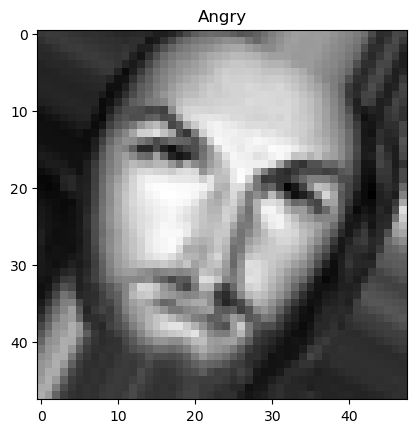

In [9]:
i=np.random.randint(0,image.shape[0])
img=image[i]
labl=class_labels[np.argmax(label[i])]
plt.imshow(img,cmap='gray')
plt.title(labl);

In [10]:
model=Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(image_hight,image_width,1)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2),strides=2),
    Dropout(0.1),
    Conv2D(128,kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2),strides=2),
    Dropout(0.1),
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
    
])
model.summary()

C:\Users\SMART.DESKTOP-QT2K8C1\Desktop\sample_project\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,554,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,650,375 (25.37 MB)

 Trainable params: 6,650,375 (25.37 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(
    optimizer='adam',
    loss=categorical_crossentropy,
    metrics=['accuracy']
)


In [12]:
early_stopping_monitor = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True) 
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.02,
                              patience=2, min_lr=0.001)

history=model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping_monitor,reduce_lr]
)

Epoch 1/50


C:\Users\SMART.DESKTOP-QT2K8C1\Desktop\sample_project\env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 95s 104ms/step - accuracy: 0.2543 - loss: 1.8056 - val_accuracy: 0.3376 - val_loss: 1.6496 - learning_rate: 0.0010
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 81s 90ms/step - accuracy: 0.3296 - loss: 1.6702 - val_accuracy: 0.4384 - val_loss: 1.4527 - learning_rate: 0.0010
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 81s 90ms/step - accuracy: 0.4068 - loss: 1.5251 - val_accuracy: 0.4749 - val_loss: 1.3595 - learning_rate: 0.0010
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 80s 89ms/step - accuracy: 0.4496 - loss: 1.4390 - val_accuracy: 0.5028 - val_loss: 1.2963 - learning_rate: 0.0010
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 81s 90ms/step - accuracy: 0.4679 - loss: 1.3830 - val_accuracy: 0.5157 - val_loss: 1.2603 - learning_rate: 0.0010
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.4801 - loss: 1.3531 - val_accuracy: 0.5091 - val_loss: 1.2706 - learning_rate: 0.0010
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.4870 - loss: 1.334

In [14]:

model.evaluate(validation_generator)

225/225 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.5936 - loss: 1.0790


[1.087867259979248, 0.5872108936309814]

In [15]:
test_images,test_labels=next(validation_generator)

In [16]:
prediction=model.predict(test_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


In [44]:
prediction=np.argmax(prediction,axis=1)
test_labels=np.argmax(test_labels,axis=1)

In [26]:
prediction.shape

(32, 7)

In [107]:
def plot_original_predicted(i):
    img=test_images[i]
    labl_original=class_labels[test_labels[i]]
    labl_predicted=class_labels[prediction[i]]
    plt.imshow(img,cmap='gray')
    plt.title(f'original expression is {labl_original}\n the predicted expression is {labl_predicted}')
    plt.xticks([])
    plt.yticks([])
    plt.show()

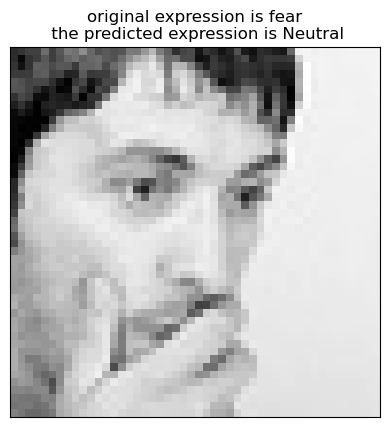

In [108]:
plot_original_predicted(17)

In [81]:
test_labels[14]

6

In [109]:
model.save('expressions.h5')